In [ ]:
import time
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForSeq2SeqLM

results = []

# Hugging Face conversational models
models_list = {
    "DialoGPT": "microsoft/DialoGPT-medium",
    "BlenderBot": "facebook/blenderbot-400M-distill",
    "FLAN-T5": "google/flan-t5-base"
}

# Common conversational prompt
prompt_text = "User: I am feeling very stressed about my exams.\nAssistant:"

# Keywords for relevance proxy
keywords = ["stress", "exam", "exams", "relax", "focus", "calm", "confidence", "prepare"]

for name, model_id in models_list.items():
    print(f"\nEvaluating {name}...")

    try:
        # Load tokenizer & model
        if "t5" in model_id.lower():
            tokenizer = AutoTokenizer.from_pretrained(model_id)
            model = AutoModelForSeq2SeqLM.from_pretrained(model_id)
        else:
            tokenizer = AutoTokenizer.from_pretrained(model_id)
            model = AutoModelForCausalLM.from_pretrained(model_id)

        # Model size (parameters)
        params_million = sum(p.numel() for p in model.parameters()) / 1e6

        # Tokenize input
        inputs = tokenizer(prompt_text, return_tensors="pt")

        # Run model (INFERENCE)
        start_gen = time.time()
        outputs = model.generate(**inputs, max_new_tokens=60)
        inference_time = time.time() - start_gen

        # Decode response
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # ---------- OUTPUT-BASED METRICS ----------
        # Response length (number of words)
        response_length = len(response.split())

        # Relevance proxy (keyword matches)
        response_lower = response.lower()
        keyword_matches = sum(1 for k in keywords if k in response_lower)

        # Store results
        results.append({
            "Model": name,
            "Model Size (M)": round(params_million, 2),          # cost
            "Latency (s)": round(inference_time, 2),             # cost
            "Response Length": response_length,                  # benefit
            "Keyword Matches": keyword_matches,                  # benefit
            "Response": response
        })

        print("Response:")
        print(response)
        print(f"Response Length: {response_length}")
        print(f"Keyword Matches: {keyword_matches}")
        print("-" * 60)

    except Exception as e:
        print(f"Error with {name}: {e}")

# Create DataFrame
df = pd.DataFrame(results)

print("\nModel Comparison Table:")
df



Evaluating DialoGPT...


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Response:
User: I am feeling very stressed about my exams.
Assistant: I'm not stressed about my exams.
Response Length: 16
Keyword Matches: 3
------------------------------------------------------------

Evaluating BlenderBot...
Error with BlenderBot: list index out of range

Evaluating FLAN-T5...
Response:
Is there anything I can do to help?
Response Length: 8
Keyword Matches: 0
------------------------------------------------------------

Model Comparison Table:


,Model,Model Size (M),Latency (s),Response Length,Keyword Matches,Response
0,DialoGPT,354.82,2.46,16,3,User: I am feeling very stressed about my exam...
1,FLAN-T5,247.58,3.66,8,0,Is there anything I can do to help?


In [4]:
import time
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForSeq2SeqLM

results = []

# --------------------------------------------------
# 1. Hugging Face Conversational / Instruction Models
# --------------------------------------------------
models_list = {
    "DialoGPT-medium": "microsoft/DialoGPT-medium",
    "DialoGPT-small": "microsoft/DialoGPT-small",
    "FLAN-T5-base": "google/flan-t5-base",
    "FLAN-T5-small": "google/flan-t5-small",
    "BlenderBot-400M": "facebook/blenderbot-400M-distill",
    "BlenderBot-90M": "facebook/blenderbot-90M"
}

# --------------------------------------------------
# 2. Common Conversational Prompt
# --------------------------------------------------
prompt_text = "User: I am feeling very stressed about my exams.\nAssistant:"

# --------------------------------------------------
# 3. Keywords for relevance proxy
# --------------------------------------------------
keywords = [
    "stress", "exam", "exams", "relax", "focus",
    "calm", "confidence", "prepare", "help"
]

# --------------------------------------------------
# 4. Model Evaluation Loop (THIS IS WHERE MODELS RUN)
# --------------------------------------------------
for name, model_id in models_list.items():
    print(f"\nEvaluating {name}...")

    try:
        # Load tokenizer & model
        if "t5" in model_id.lower():
            tokenizer = AutoTokenizer.from_pretrained(model_id)
            model = AutoModelForSeq2SeqLM.from_pretrained(model_id)
        else:
            tokenizer = AutoTokenizer.from_pretrained(model_id)
            model = AutoModelForCausalLM.from_pretrained(model_id)

        # -------------------------
        # Model Size (parameters)
        # -------------------------
        model_size_m = sum(p.numel() for p in model.parameters()) / 1e6

        # -------------------------
        # Tokenization
        # -------------------------
        inputs = tokenizer(prompt_text, return_tensors="pt")

        # -------------------------
        # Inference (MODEL IS RUN HERE)
        # -------------------------
        start_time = time.time()
        outputs = model.generate(
            **inputs,
            max_new_tokens=60,
            pad_token_id=tokenizer.eos_token_id if tokenizer.eos_token_id else None
        )
        latency = time.time() - start_time

        # -------------------------
        # Decode Output
        # -------------------------
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # -------------------------
        # Output-based Metrics
        # -------------------------
        response_length = len(response.split())
        response_lower = response.lower()
        keyword_matches = sum(1 for k in keywords if k in response_lower)

        # -------------------------
        # Store Results
        # -------------------------
        results.append({
            "Model": name,
            "Model Size (M)": round(model_size_m, 2),   # COST
            "Latency (s)": round(latency, 2),           # COST
            "Response Length": response_length,         # BENEFIT
            "Keyword Matches": keyword_matches,         # BENEFIT
            "Response": response
        })

        # Print for verification (VERY IMPORTANT)
        print("Response:")
        print(response)
        print(f"Response Length: {response_length}")
        print(f"Keyword Matches: {keyword_matches}")
        print("-" * 70)

    except Exception as e:
        print(f"Error with {name}: {e}")

# --------------------------------------------------
# 5. Create Final DataFrame
# --------------------------------------------------
df = pd.DataFrame(results)

print("\nModel Comparison Table:")
df



Evaluating DialoGPT-medium...
Response:
User: I am feeling very stressed about my exams.
Assistant: I'm not stressed about my exams.
Response Length: 16
Keyword Matches: 3
----------------------------------------------------------------------

Evaluating DialoGPT-small...


tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Response:
User: I am feeling very stressed about my exams.
Assistant: I am feeling very stressed about my exams.
Response Length: 18
Keyword Matches: 3
----------------------------------------------------------------------

Evaluating FLAN-T5-base...
Response:
Is there anything I can do to help?
Response Length: 8
Keyword Matches: 1
----------------------------------------------------------------------

Evaluating FLAN-T5-small...


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Response:
I am feeling very stressed about my exams.
Response Length: 8
Keyword Matches: 3
----------------------------------------------------------------------

Evaluating BlenderBot-400M...
Error with BlenderBot-400M: list index out of range

Evaluating BlenderBot-90M...


config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/350M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/311 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/350M [00:00<?, ?B/s]

Response:
user: i am feeling very stressed about my exams . __newln__ assistant: bubuubububibubububee bububalbububum bubuair bububbubuud bubugum bubupububuabububabubutail bubuacbubuheads bububarbubuinflbubusnakes bubuabbu@@
Response Length: 21
Keyword Matches: 3
----------------------------------------------------------------------

Model Comparison Table:


,Model,Model Size (M),Latency (s),Response Length,Keyword Matches,Response
0,DialoGPT-medium,354.82,1.73,16,3,User: I am feeling very stressed about my exam...
1,DialoGPT-small,124.44,0.89,18,3,User: I am feeling very stressed about my exam...
2,FLAN-T5-base,247.58,2.05,8,1,Is there anything I can do to help?
3,FLAN-T5-small,76.96,0.37,8,3,I am feeling very stressed about my exams.
4,BlenderBot-90M,62.03,9.48,21,3,user: i am feeling very stressed about my exam...


In [5]:
# -------------------------------
# TOPSIS IMPLEMENTATION
# -------------------------------

# Copy only numerical columns
topsis_data = df[[
    "Model Size (M)",
    "Latency (s)",
    "Response Length",
    "Keyword Matches"
]].values.astype(float)

# Weights and impacts
weights = np.array([0.25, 0.25, 0.25, 0.25])
impacts = np.array(['-', '-', '+', '+'])

# Step 1: Normalize
norm_data = topsis_data / np.sqrt((topsis_data ** 2).sum(axis=0))

# Step 2: Weighted normalization
weighted_data = norm_data * weights

# Step 3: Ideal best & worst
ideal_best = []
ideal_worst = []

for i in range(len(impacts)):
    if impacts[i] == '+':
        ideal_best.append(weighted_data[:, i].max())
        ideal_worst.append(weighted_data[:, i].min())
    else:
        ideal_best.append(weighted_data[:, i].min())
        ideal_worst.append(weighted_data[:, i].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

# Step 4: Distances
distance_best = np.sqrt(((weighted_data - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_data - ideal_worst) ** 2).sum(axis=1))

# Step 5: TOPSIS score
topsis_score = distance_worst / (distance_best + distance_worst)

# Add to dataframe
df["TOPSIS Score"] = topsis_score
df["Rank"] = df["TOPSIS Score"].rank(ascending=False)

# Sort by rank
df_sorted = df.sort_values("Rank")

df_sorted


,Model,Model Size (M),Latency (s),Response Length,Keyword Matches,Response,TOPSIS Score,Rank
1,DialoGPT-small,124.44,0.89,18,3,User: I am feeling very stressed about my exam...,0.865508,1.0
3,FLAN-T5-small,76.96,0.37,8,3,I am feeling very stressed about my exams.,0.748953,2.0
0,DialoGPT-medium,354.82,1.73,16,3,User: I am feeling very stressed about my exam...,0.569415,3.0
2,FLAN-T5-base,247.58,2.05,8,1,Is there anything I can do to help?,0.540562,4.0
4,BlenderBot-90M,62.03,9.48,21,3,user: i am feeling very stressed about my exam...,0.468628,5.0


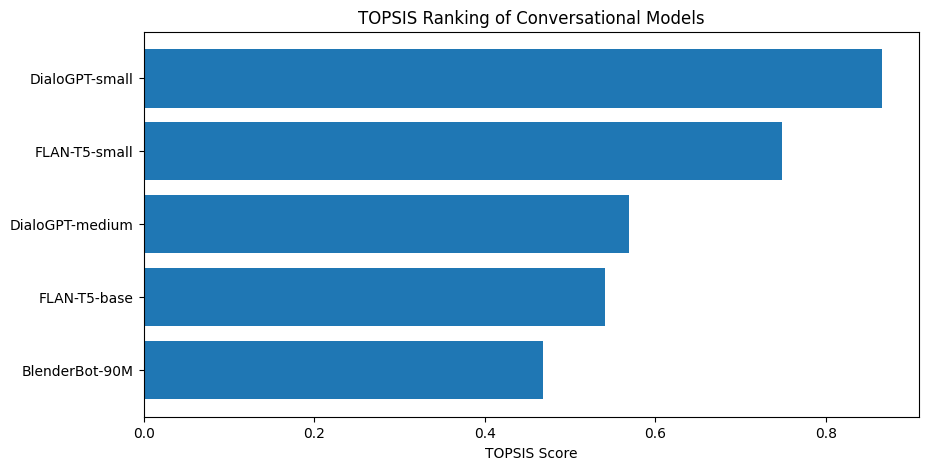

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(df_sorted["Model"], df_sorted["TOPSIS Score"])
plt.xlabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Conversational Models")
plt.gca().invert_yaxis()
plt.show()


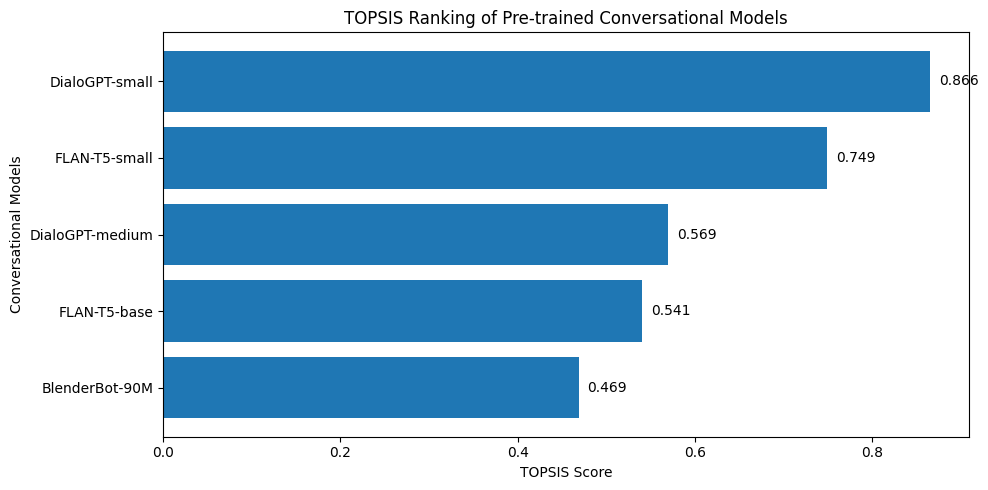

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.barh(
    df_sorted["Model"],
    df_sorted["TOPSIS Score"]
)

plt.xlabel("TOPSIS Score")
plt.ylabel("Conversational Models")
plt.title("TOPSIS Ranking of Pre-trained Conversational Models")

# Highest rank on top
plt.gca().invert_yaxis()

# Score labels on bars
for index, value in enumerate(df_sorted["TOPSIS Score"]):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center')

plt.tight_layout()
plt.savefig("topsis_conversational_ranking.png")
plt.show()
